# Introduction

First of all, we import the <b>libraries</b>

In [43]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

Let's find out what we need to analyse

In [21]:
df = pd.read_csv('all_data.csv')
print(df.head())
print(df['Country'].unique())
print(df['Year'].unique())

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10
['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']
[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


**Data sources**

- GDP Source: [World Bank](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD) national accounts data, and OECD National Accounts data files.

- Life expectancy Data Source: [World Health Organization](http://apps.who.int/gho/data/node.main.688)

<b>Six countries</b> will be analysed from <b>2000 to 2015</b>, with the following data:
+ <i>Life expectancy at birth (years) </i>
+ <i>GDP (Gross Domestic Product) </i>

As a result of this analysis, what will we try to understand?
+ Has the GDP of the respective countries always increased over the years?
+ Has life expectancy in different countries always increased over the years?
+ Is there a correlation between GDP increase and life expectancy at birth?
+ Which country has shown the greatest increase in GDP?
+ Which country has shown the greatest increase in life expectancy at birth?
+ The country with the greatest percentage increase in GDP is the same as the country with the greatest increase in life expectancy? 

Let's clean up our database to better analyse it

In [22]:
df = df.rename({"Life expectancy at birth (years)":"LEABY"}, axis = "columns")
print(df.head())

  Country  Year  LEABY           GDP
0   Chile  2000   77.3  7.786093e+10
1   Chile  2001   77.3  7.097992e+10
2   Chile  2002   77.8  6.973681e+10
3   Chile  2003   77.9  7.564346e+10
4   Chile  2004   78.0  9.921039e+10


In [23]:
chile = df[df['Country'] == 'Chile']
china = df[df['Country'] == 'China']
germany = df[df['Country'] == 'Germany']
mexico = df[df['Country'] == 'Mexico']
us = df[df['Country'] == 'United States of America']
zimbabwe = df[df['Country'] == 'Zimbabwe']

The first question will be analysed: 
1. Has the GDP of the respective countries always increased over the years?


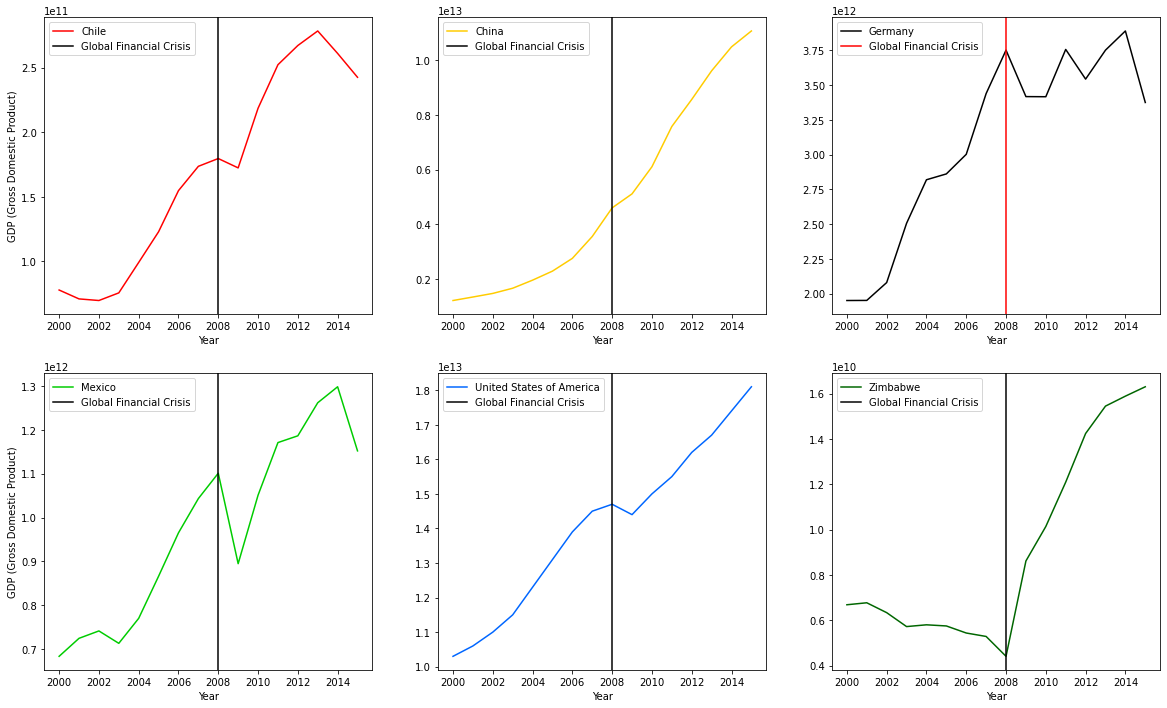

In [24]:
plt.figure(figsize=(20,12))
plt.subplot(2, 3, 1)
plt.plot(chile['Year'], chile['GDP'], color='red')
plt.axvline(2008, color = 'black')
plt.xlabel('Year')
plt.ylabel('GDP (Gross Domestic Product)')
plt.legend(['Chile', 'Global Financial Crisis'])
plt.subplot(2, 3, 2)
plt.plot(china['Year'], china['GDP'], color='#ffcc00')
plt.axvline(2008, color = 'black')
plt.xlabel('Year')
plt.legend(['China', 'Global Financial Crisis'])
plt.subplot(2, 3, 3)
plt.plot(germany['Year'], germany['GDP'], color='black')
plt.axvline(2008, color = 'red')
plt.xlabel('Year')
plt.legend(['Germany', 'Global Financial Crisis'])
plt.subplot(2, 3, 4)
plt.plot(mexico['Year'], mexico['GDP'], color='#00cc00')
plt.axvline(2008, color = 'black')
plt.xlabel('Year')
plt.ylabel('GDP (Gross Domestic Product)')
plt.legend(['Mexico', 'Global Financial Crisis'])
plt.subplot(2, 3, 5)
plt.plot(us['Year'], us['GDP'], color='#0066ff')
plt.axvline(2008, color = 'black')
plt.xlabel('Year')
plt.legend(['United States of America', 'Global Financial Crisis'])
plt.subplot(2, 3, 6)
plt.plot(zimbabwe['Year'], zimbabwe['GDP'], color='#006600')
plt.axvline(2008, color = 'black')
plt.xlabel('Year')
plt.legend(['Zimbabwe', 'Global Financial Crisis'])
plt.show()

The second question we are going to analyse:

2. Has life expectancy in different countries always increased over the years?

<Figure size 432x288 with 0 Axes>

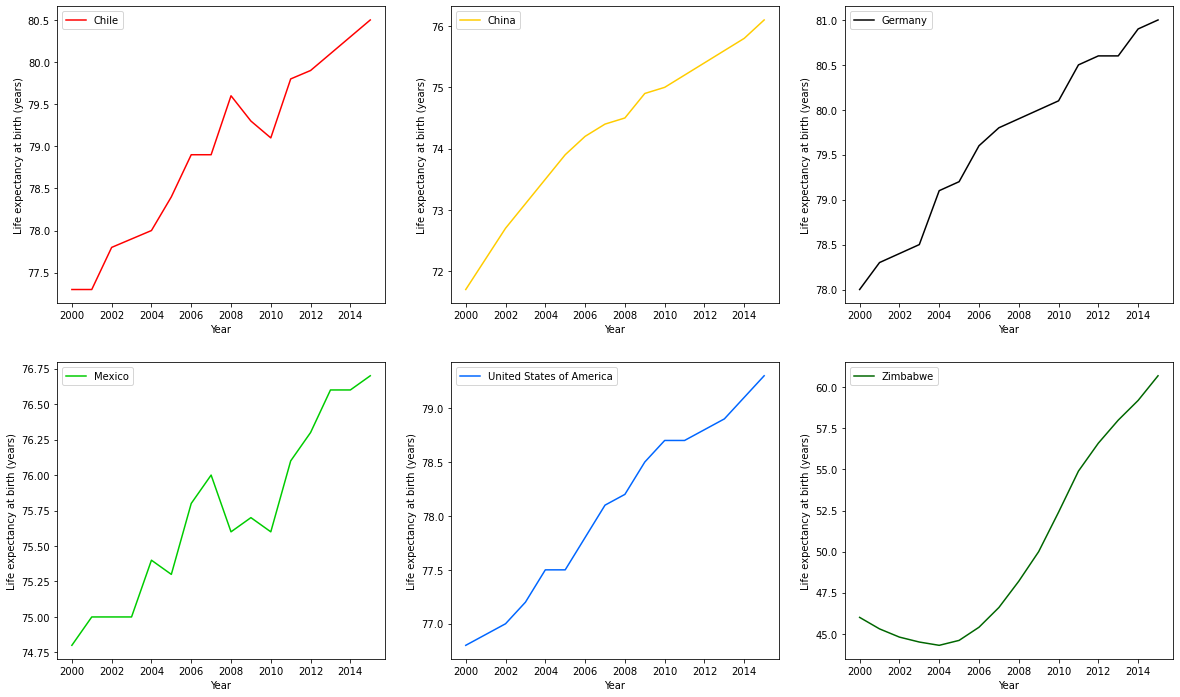

In [25]:
plt.clf()

plt.figure(figsize=(20,12))
plt.subplot(2, 3, 1)
plt.plot(chile['Year'], chile['LEABY'], color='red')
plt.xlabel('Year')
plt.ylabel('Life expectancy at birth (years)')
plt.legend(['Chile'])
plt.subplot(2, 3, 2)
plt.plot(china['Year'], china['LEABY'], color='#ffcc00')
plt.xlabel('Year')
plt.ylabel('Life expectancy at birth (years)')
plt.legend(['China'])
plt.subplot(2, 3, 3)
plt.plot(germany['Year'], germany['LEABY'], color='black')
plt.xlabel('Year')
plt.ylabel('Life expectancy at birth (years)')
plt.legend(['Germany'])
plt.subplot(2, 3, 4)
plt.plot(mexico['Year'], mexico['LEABY'], color='#00cc00')
plt.xlabel('Year')
plt.ylabel('Life expectancy at birth (years)')
plt.legend(['Mexico'])
plt.subplot(2, 3, 5)
plt.plot(us['Year'], us['LEABY'], color='#0066ff')
plt.xlabel('Year')
plt.ylabel('Life expectancy at birth (years)')
plt.legend(['United States of America'])
plt.subplot(2, 3, 6)
plt.plot(zimbabwe['Year'], zimbabwe['LEABY'], color='#006600')
plt.xlabel('Year')
plt.ylabel('Life expectancy at birth (years)')
plt.legend(['Zimbabwe'])
plt.show()


Last questions: 

+ Is there a correlation between GDP increase and life expectancy at birth?
+ Which country has shown the greatest increase in GDP?
+ Which country has shown the greatest increase in life expectancy at birth?
+ The country with the greatest percentage increase in GDP is the same as the country with the greatest increase in life expectancy? 

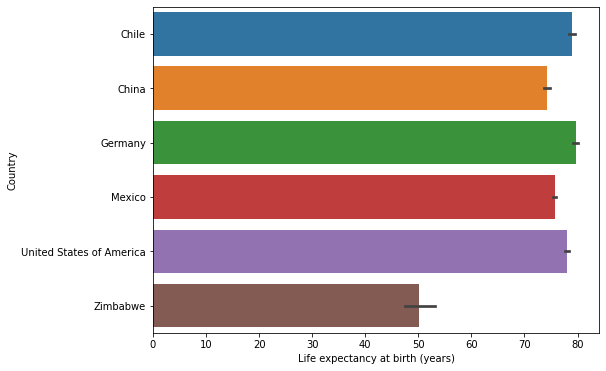

In [27]:
plt.figure(figsize=(8,6))
sns.barplot(x="LEABY", y="Country", data=df)
plt.xlabel("Life expectancy at birth (years)");

In [28]:
def increase_perce(df_name, column):
    x = df_name[column].reset_index(drop = True)
    y = []
    for i in range(1,16):
        y.append(((x[i] - x[0]) / x[i]) * 100)
    return y


In [29]:
chile_new = pd.DataFrame()
chile_new['Year'] = range(2001 , 2016)
chile_new['GDP'] = increase_perce(chile, 'GDP')
chile_new['LEABY'] = increase_perce(chile, 'LEABY')

china_new = pd.DataFrame()
china_new['Year'] = range(2001 , 2016)
china_new['GDP'] = increase_perce(china, 'GDP')
china_new['LEABY'] = increase_perce(china, 'LEABY')

germany_new = pd.DataFrame()
germany_new['Year'] = range(2001 , 2016)
germany_new['GDP'] = increase_perce(germany, 'GDP')
germany_new['LEABY'] = increase_perce(germany, 'LEABY')

mexico_new = pd.DataFrame()
mexico_new['Year'] = range(2001 , 2016)
mexico_new['GDP'] = increase_perce(mexico, 'GDP')
mexico_new['LEABY'] = increase_perce(mexico, 'LEABY')

us_new = pd.DataFrame()
us_new['Year'] = range(2001 , 2016)
us_new['GDP'] = increase_perce(us, 'GDP')
us_new['LEABY'] = increase_perce(us, 'LEABY')

zimbabwe_new = pd.DataFrame()
zimbabwe_new['Year'] = range(2001 , 2016)
zimbabwe_new['GDP'] = increase_perce(zimbabwe, 'GDP')
zimbabwe_new['LEABY'] = increase_perce(zimbabwe, 'LEABY')

<Figure size 432x288 with 0 Axes>

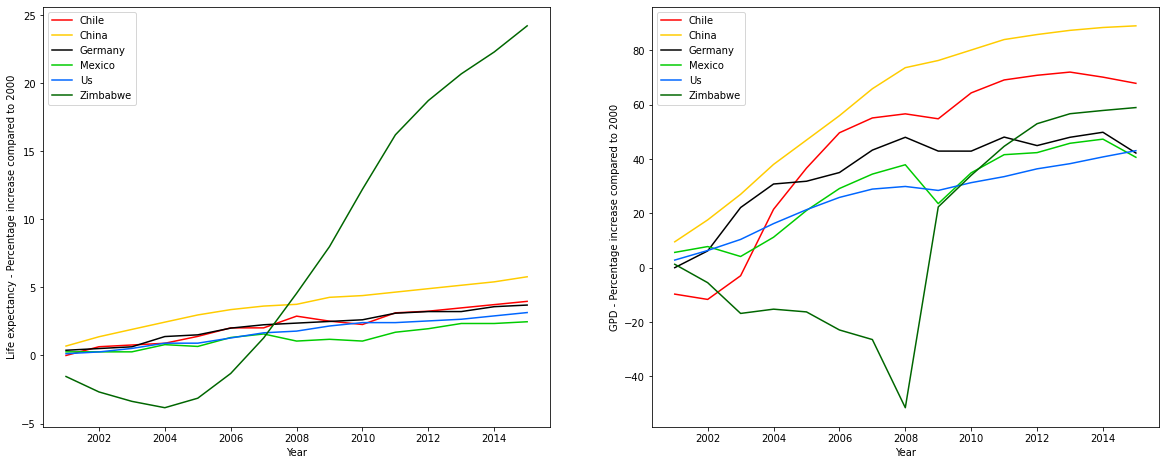

In [42]:
plt.clf()
plt.figure(figsize=(20,17))
plt.subplot(2, 2, 1)
plt.plot(chile_new['Year'], chile_new['LEABY'], color='red')
plt.plot(china_new['Year'], china_new['LEABY'], color='#ffcc00')
plt.plot(germany_new['Year'], germany_new['LEABY'], color='black')
plt.plot(mexico_new['Year'], mexico_new['LEABY'], color='#00cc00')
plt.plot(us_new['Year'], us_new['LEABY'], color='#0066ff')
plt.plot(zimbabwe_new['Year'], zimbabwe_new['LEABY'], color='#006600')
plt.xlabel('Year')
plt.ylabel('Life expectancy - Percentage increase compared to 2000')
plt.legend(['Chile', 'China', 'Germany', 'Mexico', 'Us', 'Zimbabwe'])

plt.subplot(2, 2, 2)
plt.plot(chile_new['Year'], chile_new['GDP'], color='red')
plt.plot(china_new['Year'], china_new['GDP'], color='#ffcc00')
plt.plot(germany_new['Year'], germany_new['GDP'], color='black')
plt.plot(mexico_new['Year'], mexico_new['GDP'], color='#00cc00')
plt.plot(us_new['Year'], us_new['GDP'], color='#0066ff')
plt.plot(zimbabwe_new['Year'], zimbabwe_new['GDP'], color='#006600')
plt.legend(['Chile', 'China', 'Germany', 'Mexico', 'Us', 'Zimbabwe'])
plt.ylabel('GPD - Percentage increase compared to 2000')
plt.xlabel('Year')
plt.show()



#### We can now proceed to the conclusion of this analysis

1. Has the GDP of the respective countries always increased over the years?

Generally speaking, looking at the whole period, from the year <b>2000 to 2015</b>, the GDP of the countries <b>increased</b>, considering the collapse in 2008 with the global financial crisis (GFC).

2. Has life expectancy in different countries always increased over the years?

Life expectancy has also always increased over the years, with a small interesting fact. In the <b>poorest</b> of the six countries, we have seen a <b>greater increase</b> than in the more developed countries.

3. Is there a correlation between GDP increase and life expectancy at birth?

Is there a correlation between the two figures? Yes, we have noticed that the two data are linked, the GDP increase pulls the life expectancy, but this is not always true. In fact, there are some of the countries analysed, the richest ones, that see an increase but it is not particularly high and in reality the richest country does not have the highest life expectancy, this means that GDP certainly provides an explanation for the increase in life expectancy but more data would be needed to have a complete picture.


4. Which country has shown the greatest increase in GDP?

The country with the greatest increase in GDP is <b>China</b>

5. Which country has shown the greatest increase in life expectancy at birth?

The country with the greatest increase in Life Expectancy at Birth is <b>Zimbabwe</b>

6. The country with the greatest percentage increase in GDP is the same as the country with the greatest increase in life expectancy? 

No, the two countries are different.